In [2]:
import matplotlib.pyplot as plt
import datetime
import os
import json
from sklearn.metrics import (
    roc_auc_score,
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
    classification_report,
)
import numpy as np
from main_pygod import get_data_from_loader, load_dataset, make_loader, create_model, train_model, test_model
import warnings

In [3]:
def create_metrics():
    return {"overall": {"roc_auc": [], "accuracy": [],"f1": [], "precision": [], "recall": []},
            "licit": {"precision": [], "recall": [],"f1-score": []}, 
           "illicit":{"precision": [], "recall": [],"f1-score": []}}

def hyperparameter_loop(group_para, parameter, parameter_list, metrics):
    """
    Run a grid search for a hyperparameter
    Args: hyperparameter, hyperparameter list, classification metrics (empty dict)
    Returns: Classification metrics dictionary
    """ 
    warnings.filterwarnings('ignore')
    for i in range(len(parameter_list)):
        config[group_para][parameter] = parameter_list[i]
        dataset, input_nodes = load_dataset(mask="train",use_aggregated=config["data"]["use_aggregated"],use_temporal=config["data"]["use_temporal"])
        loader = make_loader(data=dataset, loader_type='neighbor', batch_size=config["data"]["batch_size"], input_nodes=input_nodes)
        train_data = get_data_from_loader(loader)

        mymodel = create_model(config=config["model"])

        trained_model = train_model(mymodel, train_data)
    
        dataset, input_nodes = load_dataset(mask="test",use_aggregated=config["data"]["use_aggregated"],
        use_temporal=config["data"]["use_temporal"])
        loader = make_loader(data=dataset, loader_type='neighbor', batch_size=config["data"]["batch_size"], input_nodes=input_nodes,)    
        test_data = get_data_from_loader(loader)

        test_metrics = test_model(model=trained_model, data=test_data, output_directory=config["training"]["save_dir"])

        for key in list(test_metrics.keys())[0:-1]:
            metrics["overall"][key].append(test_metrics[key])
        output = test_metrics["classification_report"]
        for key in list(output["0"].keys())[0:-1]:
            metrics["licit"][key].append(output["0"][key])
            metrics["illicit"][key].append(output["1"][key])
        
    return metrics

def plot_metrics(metrics, para_list, parameter, x_log = False):
    """
    Plot the classification metrics
    Args:classification metrics
    Returns:None
    """ 

    size = (8,3)
    plt.figure(figsize= size)
    for key in list(metrics["overall"]):
        plt.plot(para_list, metrics["overall"][key], label= key)
    plt.xlabel(parameter)
    plt.ylabel("Total Metrics")
    if x_log:  plt.xscale("log")
    plt.title("Overall Classification Metrics")
    plt.legend(loc=(1.04, 0))
    plt.tight_layout()
    plt.show()

    plt.figure(figsize= size)
    for key in list(metrics["licit"]):
        plt.plot(para_list, metrics["licit"][key], label= key)
    plt.xlabel(parameter)
    plt.ylabel("Licit Metrics")
    if x_log:  plt.xscale("log")
    plt.title("Licit Classification Metrics")
    plt.legend(loc=(1.04, 0))
    plt.tight_layout()
    plt.show()

    plt.figure(figsize= size)
    for key in list(metrics["illicit"]):
        plt.plot(para_list, metrics["illicit"][key], label= key)
    plt.xlabel(parameter)
    plt.ylabel("Illicit Metrics")
    if x_log:  plt.xscale("log")
    plt.title("Illicit Classification Metrics")
    plt.legend(loc=(1.04, 0))
    plt.tight_layout()
    plt.show()

In [4]:
config = {
        "model": {
            "hid_dim": 64,
            "num_layers": 3,
            "dropout": 0.0,
            "weight_decay": 0.0,
            "contamination": 0.1,
            "backbone": "gcn",
            "lr": 0.005,
            "epoch": 10,
            "batch_size": 0,
            "num_neigh": 10,
            "weight": 0.5,
            "verbose": 2,
        },
        "data": {
            "use_aggregated": False,
            "use_temporal": False,
            "batch_size": 2048
        },
        "training": {
            "save_embeddings": False,
            "save_dir": "./saved_models",
        },
        "classifiers": ["rf", "mlp"],
    }

#### Number of layers

In [6]:
metrics = create_metrics()
para_change = "num_layers"
para_list = [2, 3, 4, 5, 6,7]

metrics = hyperparameter_loop("model", para_change, para_list, metrics)

data loaded from loader:
Data(x=[3181, 93], edge_index=[2, 3104], y=[3181])
creating model with {'hid_dim': 64, 'num_layers': 2, 'dropout': 0.0, 'weight_decay': 0.0, 'act': <function relu at 0x0000028192CB5C60>, 'sigmoid_s': False, 'contamination': 0.1, 'lr': 0.005, 'epoch': 10, 'gpu': -1, 'batch_size': 0, 'num_neigh': 10, 'weight': 0.5, 'verbose': 2, 'backbone': <class 'torch_geometric.nn.models.basic_gnn.GCN'>}
training model...
Epoch 0000: Loss 13207.2861 |  | Time 0.06
Epoch 0001: Loss 6487.7202 |  | Time 0.07
Epoch 0002: Loss 3078.8572 |  | Time 0.07
Epoch 0003: Loss 1622.9022 |  | Time 0.07
Epoch 0004: Loss 1235.2765 |  | Time 0.06
Epoch 0005: Loss 1278.4636 |  | Time 0.07
Epoch 0006: Loss 1373.7897 |  | Time 0.07
Epoch 0007: Loss 1378.0985 |  | Time 0.06
Epoch 0008: Loss 1282.5555 |  | Time 0.07
Epoch 0009: Loss 1137.5286 |  | Time 0.07
model training complete!
embeddings saved to ./outputs\embeddings_None.npy
labels saved to ./outputs\labels_None.npy
data loaded from loader:
Da

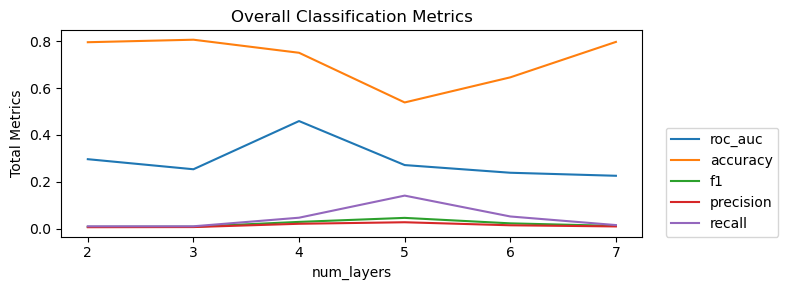

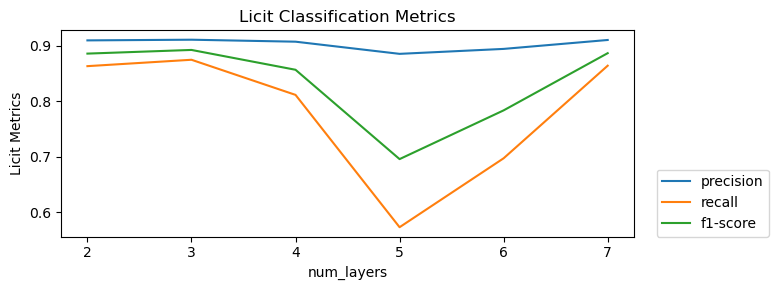

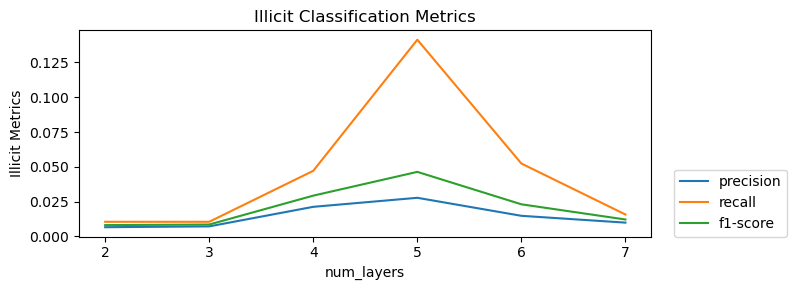

In [7]:
plot_metrics(metrics, para_list, para_change, x_log=False)

#### Hidden Dimension

In [30]:
metrics = create_metrics()
para_change = "hid_dim"
para_list = [32, 64, 128, 256, 512]

metrics = hyperparameter_loop("model", para_change, para_list, metrics)

data loaded from loader:
Data(x=[3189, 93], edge_index=[2, 3112], y=[3189])
creating model with {'hid_dim': 32, 'num_layers': 7, 'dropout': 0.3, 'weight_decay': 0.0, 'act': <function relu at 0x0000028192CB5C60>, 'sigmoid_s': False, 'contamination': 0.1, 'lr': 0.005, 'epoch': 10, 'gpu': -1, 'batch_size': 0, 'num_neigh': 10, 'weight': 0.5, 'verbose': 2, 'backbone': <class 'torch_geometric.nn.models.basic_gnn.GCN'>}
training model...
Epoch 0000: Loss 328.4883 |  | Time 0.10
Epoch 0001: Loss 147.0594 |  | Time 0.08
Epoch 0002: Loss 63.4123 |  | Time 0.09
Epoch 0003: Loss 39.6408 |  | Time 0.10
Epoch 0004: Loss 25.2286 |  | Time 0.09
Epoch 0005: Loss 15.3148 |  | Time 0.08
Epoch 0006: Loss 19.9837 |  | Time 0.10
Epoch 0007: Loss 11.2478 |  | Time 0.08
Epoch 0008: Loss 9.4907 |  | Time 0.09
Epoch 0009: Loss 10.1363 |  | Time 0.07
model training complete!
embeddings saved to ./outputs\embeddings_None.npy
labels saved to ./outputs\labels_None.npy
data loaded from loader:
Data(x=[4177, 93], edg

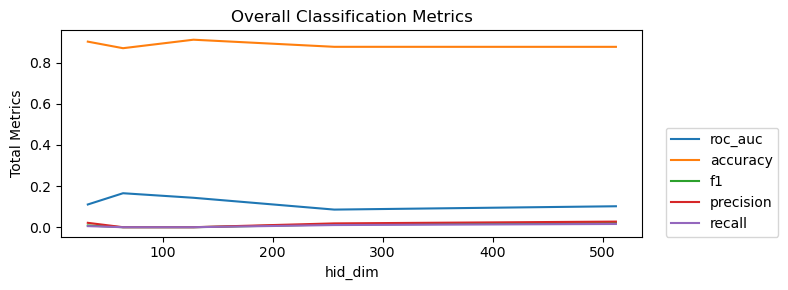

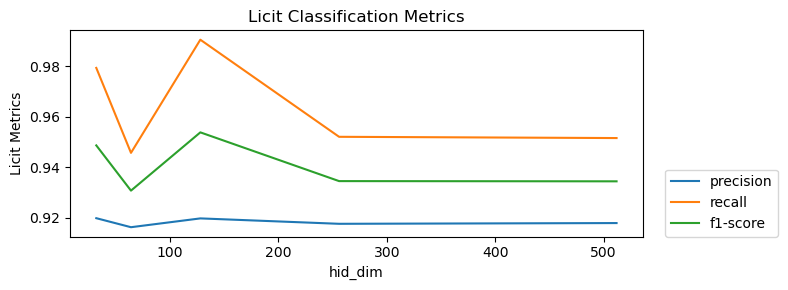

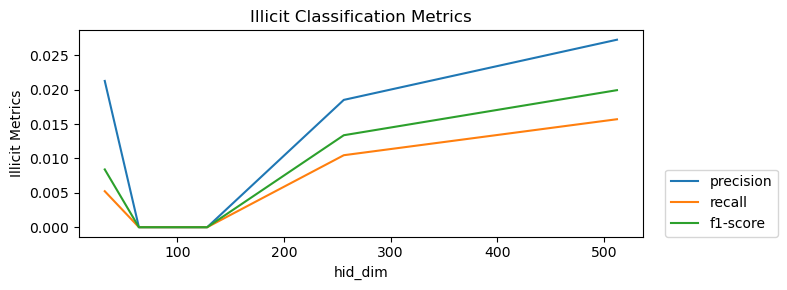

In [31]:
plot_metrics(metrics, para_list, para_change, x_log=False)

#### Dropout

In [12]:
metrics = create_metrics()
para_change = "dropout"
para_list = [0.0, 0.1, 0.2, 0.3]

metrics = hyperparameter_loop("model", para_change, para_list, metrics)

data loaded from loader:
Data(x=[3189, 93], edge_index=[2, 3112], y=[3189])
creating model with {'hid_dim': 64, 'num_layers': 7, 'dropout': 0.0, 'weight_decay': 0.0, 'act': <function relu at 0x0000028192CB5C60>, 'sigmoid_s': False, 'contamination': 0.1, 'lr': 0.005, 'epoch': 10, 'gpu': -1, 'batch_size': 0, 'num_neigh': 10, 'weight': 0.5, 'verbose': 2, 'backbone': <class 'torch_geometric.nn.models.basic_gnn.GCN'>}
training model...
Epoch 0000: Loss 593.5152 |  | Time 0.10
Epoch 0001: Loss 88.7555 |  | Time 0.09
Epoch 0002: Loss 39.2837 |  | Time 0.08
Epoch 0003: Loss 19.7003 |  | Time 0.08
Epoch 0004: Loss 14.7595 |  | Time 0.07
Epoch 0005: Loss 13.8955 |  | Time 0.10
Epoch 0006: Loss 10.9099 |  | Time 0.08
Epoch 0007: Loss 8.9436 |  | Time 0.08
Epoch 0008: Loss 7.8918 |  | Time 0.08
Epoch 0009: Loss 7.2192 |  | Time 0.08
model training complete!
embeddings saved to ./outputs\embeddings_None.npy
labels saved to ./outputs\labels_None.npy
data loaded from loader:
Data(x=[4190, 93], edge_i

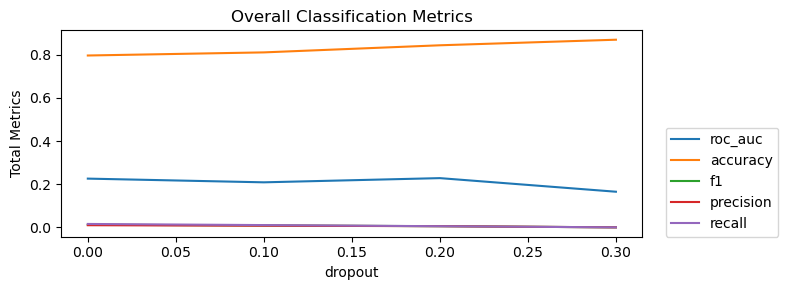

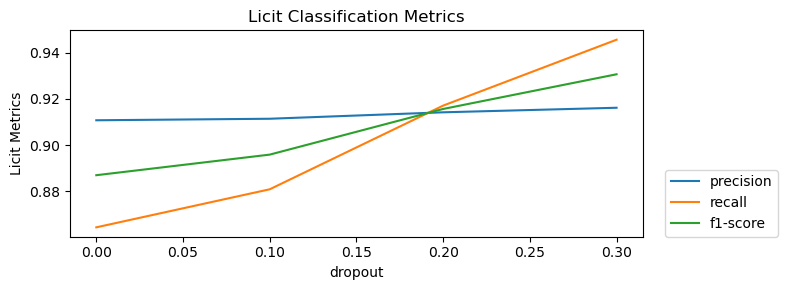

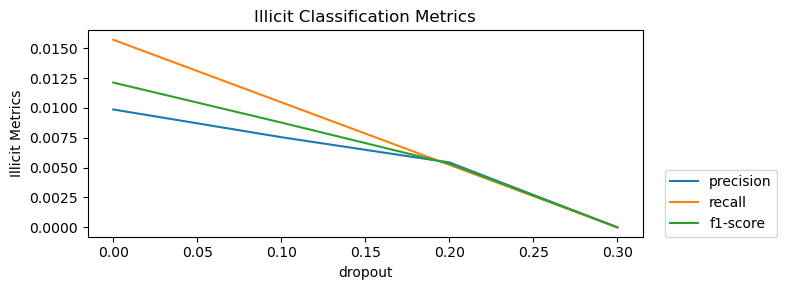

In [13]:
plot_metrics(metrics, para_list, para_change, x_log=False)

#### Number of neighbors

In [34]:
metrics = create_metrics()
para_change = "num_neigh"
para_list = [5,10,15,20]

metrics = hyperparameter_loop("model", para_change, para_list, metrics)

data loaded from loader:
Data(x=[3189, 93], edge_index=[2, 3112], y=[3189])
creating model with {'hid_dim': 512, 'num_layers': 7, 'dropout': 0.3, 'weight_decay': 0.0, 'act': <function relu at 0x0000028192CB5C60>, 'sigmoid_s': False, 'contamination': 0.1, 'lr': 0.005, 'epoch': 10, 'gpu': -1, 'batch_size': 0, 'num_neigh': 5, 'weight': 0.5, 'verbose': 2, 'backbone': <class 'torch_geometric.nn.models.basic_gnn.GCN'>}
training model...
Epoch 0000: Loss 2923.2988 |  | Time 0.38
Epoch 0001: Loss 41672.0312 |  | Time 0.40
Epoch 0002: Loss 185.9908 |  | Time 0.36
Epoch 0003: Loss 35.9480 |  | Time 0.38
Epoch 0004: Loss 13.2911 |  | Time 0.37
Epoch 0005: Loss 10.5397 |  | Time 0.35
Epoch 0006: Loss 10.0537 |  | Time 0.38
Epoch 0007: Loss 9.5464 |  | Time 0.37
Epoch 0008: Loss 8.3546 |  | Time 0.35
Epoch 0009: Loss 9.1175 |  | Time 0.37
model training complete!
embeddings saved to ./outputs\embeddings_None.npy
labels saved to ./outputs\labels_None.npy
data loaded from loader:
Data(x=[4157, 93], e

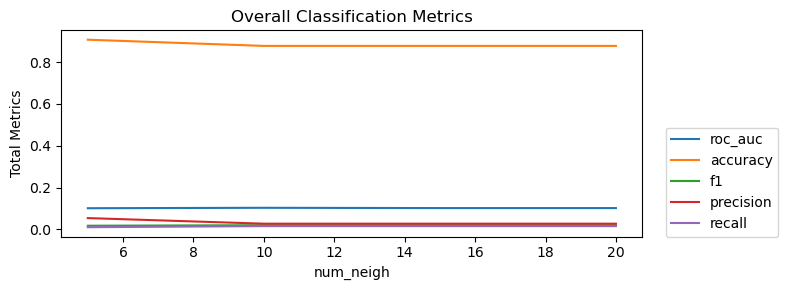

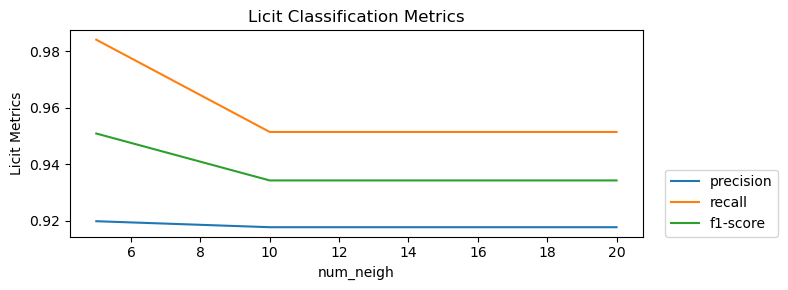

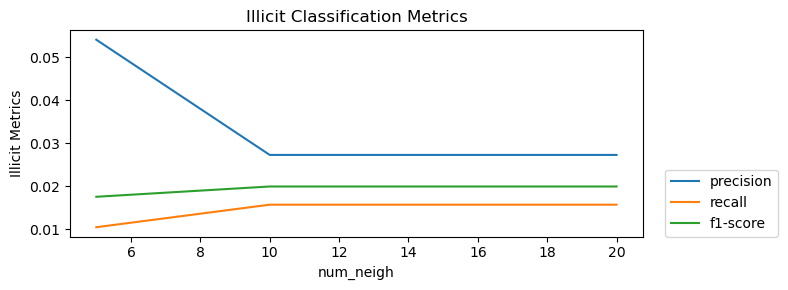

In [36]:
plot_metrics(metrics, para_list, para_change, x_log=False)